In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")

In [3]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.shape

(37249, 2)

In [5]:
df.sample()['clean_comment'].values

array(['thats expected him nothing surprising whats worse was the crowd cheering his comments '],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [7]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [8]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [9]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(350)

In [12]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [16]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [17]:
df['clean_comment'] = df['clean_comment'].str.lower()

In [18]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [19]:
df[df['clean_comment'].apply(lambda x : x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [20]:
df['clean_comment'] = df['clean_comment'].str.strip()

In [21]:
df[df['clean_comment'].apply(lambda x : x.endswith(' ') or x.startswith(' '))]

,clean_comment,category


In [22]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

In [23]:
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex = True)]

In [24]:
comments_with_urls.head()

,clean_comment,category


In [25]:
comments_with_newline = df[df['clean_comment'].str.contains("\n")]

In [26]:
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [27]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex = True)

In [28]:
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]

In [29]:
comments_with_newline_remaining

,clean_comment,category


# EDA

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

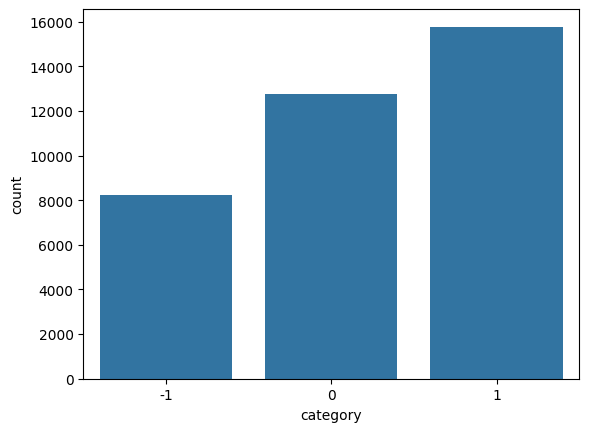

In [31]:
sns.countplot(data = df, x = 'category')
plt.savefig("../visuals/category_count.png")

In [32]:
df['category'].value_counts(normalize = True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [33]:
df['word_count'] = df['clean_comment'].apply(lambda x : len(x.split()))

In [34]:
df.sample(5)

,clean_comment,category,word_count
8365,standard ppr league teams really feel like dra...,1,36
18237,fair enough,1,2
20945,one christian friends told about story that fa...,1,101
1045,really wonder the logical dissonance this post...,1,54
27745,thats what happens when you are ent isengard,0,8


In [35]:
df['word_count'].describe()

count    36793.000000
mean        29.667464
std         56.790738
min          1.000000
25%          6.000000
50%         13.000000
75%         30.000000
max       1307.000000
Name: word_count, dtype: float64

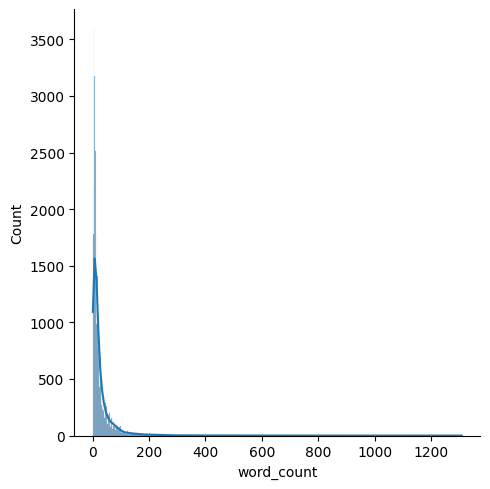

In [36]:
sns.displot(df['word_count'], kde = True)

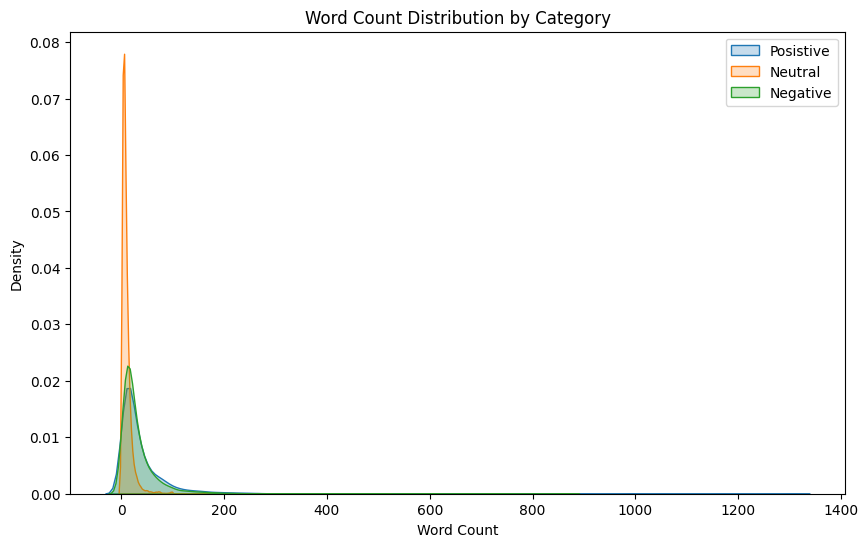

In [38]:
plt.figure(figsize=(10,6))

sns.kdeplot(df[df['category'] == 1]['word_count'], label = "Posistive", fill = True)
sns.kdeplot(df[df['category'] == 0]['word_count'], label = "Neutral", fill = True)
sns.kdeplot(df[df['category'] == -1]['word_count'], label = "Negative", fill = True)

plt.title('Word Count Distribution by Category')
plt.xlabel("Word Count")
plt.ylabel('Density')

plt.legend()

plt.show()

**Positive comments (category 1)**: These tend to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.<br>
**Neutral comments (category 0)**: The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.<br>
**Negative comments (category -1)**: These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: ylabel='word_count'>

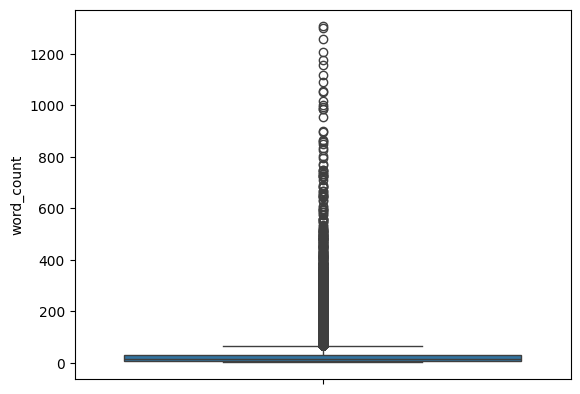

In [40]:
sns.boxplot(df['word_count'])

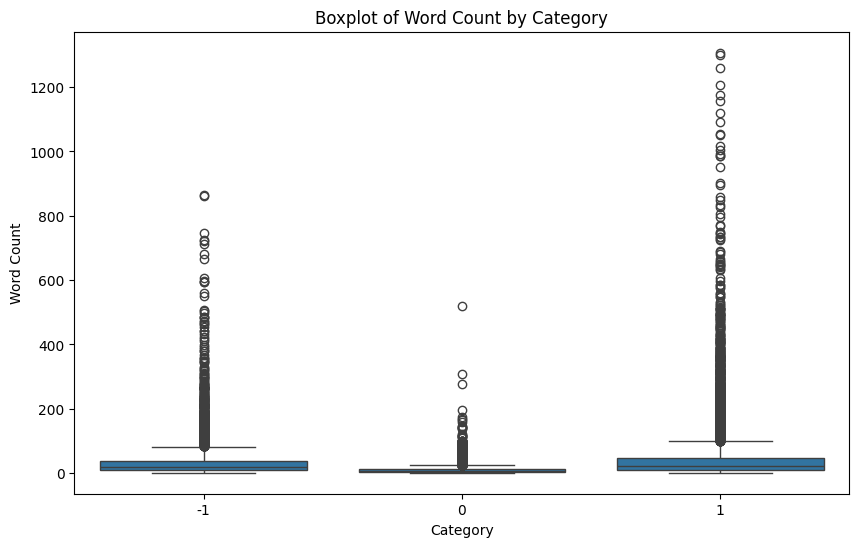

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

**Positive comments (category 1)**: The median word count is relatively high, and there are several outliers with longer comments, indicating that positive comments tend to be more verbose.<br>
**Neutral comments (category 0)**: The median word count is the lowest, with a tighter interquartile range (IQR), suggesting that neutral comments are generally shorter.<br>
**Negative comments (category -1)**: The word count distribution is similar to positive comments but with a slightly lower median and fewer extreme outliers.

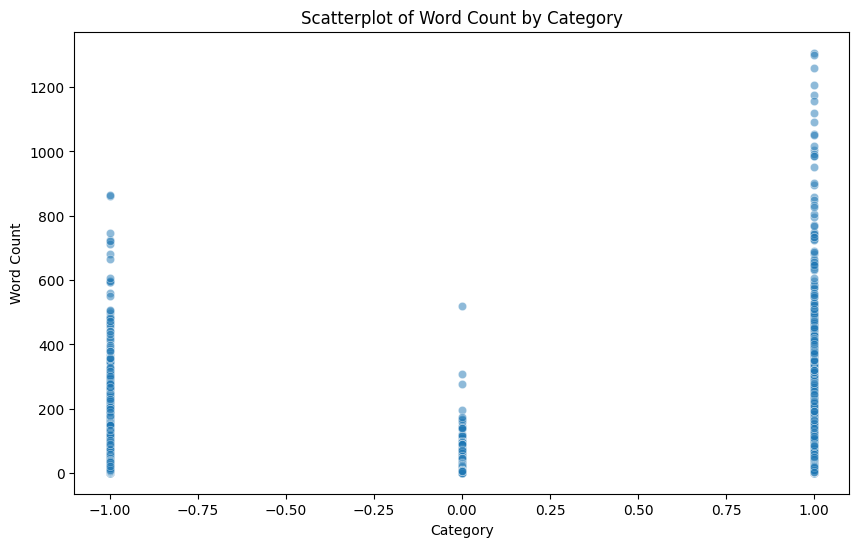

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

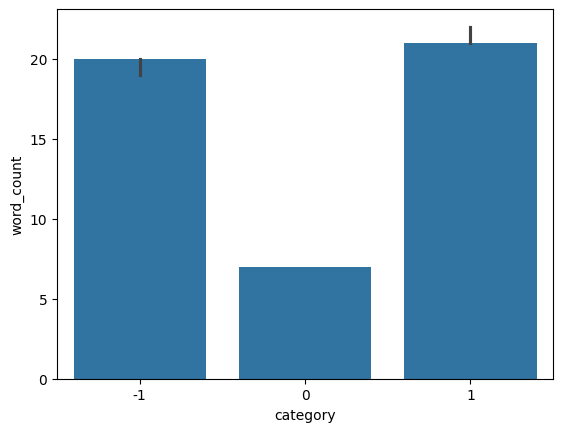

In [43]:
sns.barplot(df, x = 'category', y = 'word_count', estimator='median')

In [45]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['num_stop_words'] = df['clean_comment'].apply(lambda x : len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
30349,how about the lane highway does that not count,0,9,6
5435,devo rimanere ufficio altre ore poco fare non ...,0,13,0
17803,projected score the end overs,0,5,1
23276,the long press the recents button for multiwin...,1,175,61
17073,most upper caste are vote banks bjp asking the...,0,11,3


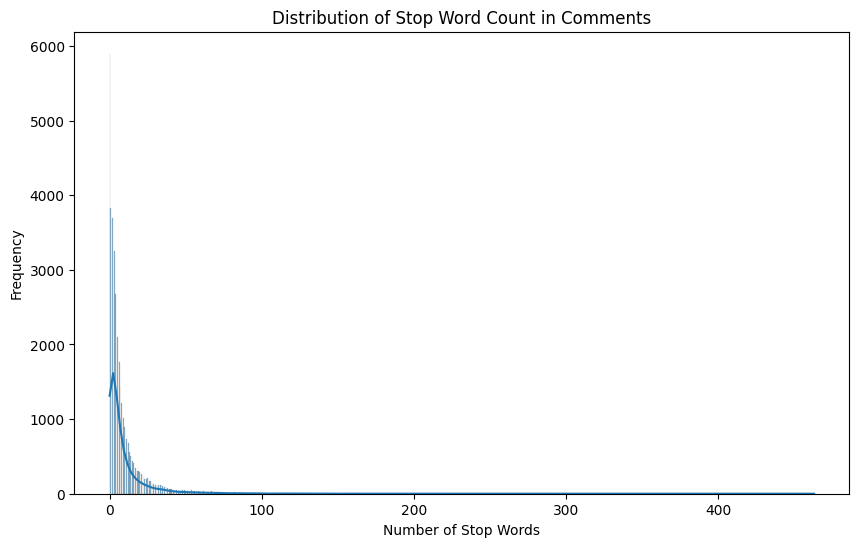

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

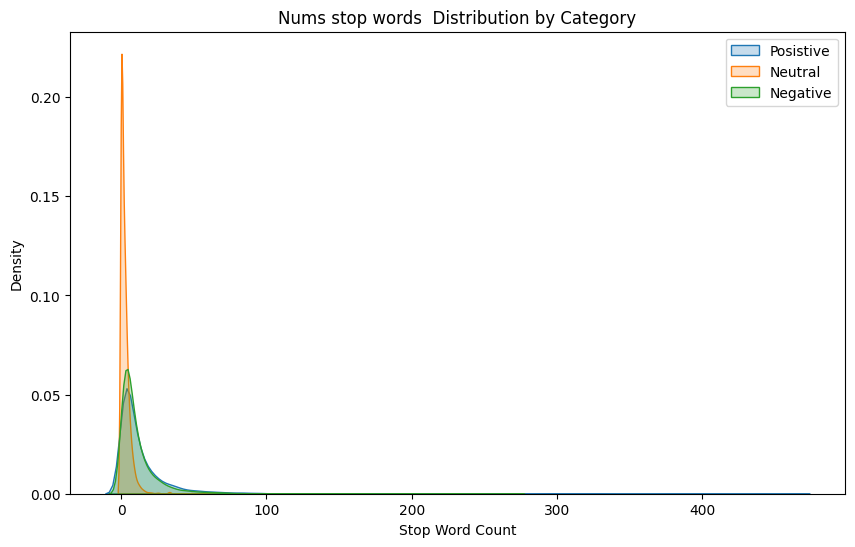

In [48]:
plt.figure(figsize=(10,6))

sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label = "Posistive", fill = True)
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label = "Neutral", fill = True)
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label = "Negative", fill = True)

plt.title('Nums stop words  Distribution by Category')
plt.xlabel("Stop Word Count")
plt.ylabel('Density')

plt.legend()

plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

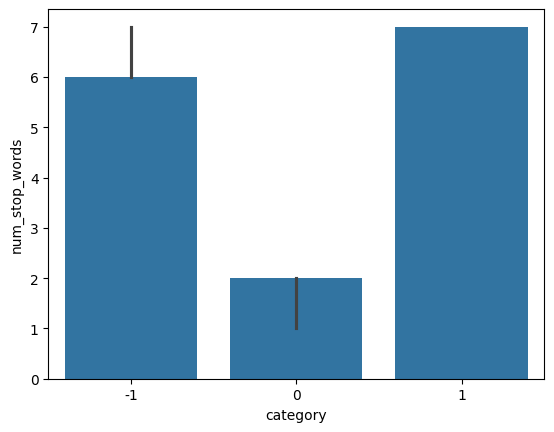

In [49]:
sns.barplot(df, x = 'category', y = 'num_stop_words', estimator = 'median')

In [50]:
from collections import Counter

In [51]:
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

most_common_stop_words = Counter(all_stop_words).most_common(25)

top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_words', 'count'])


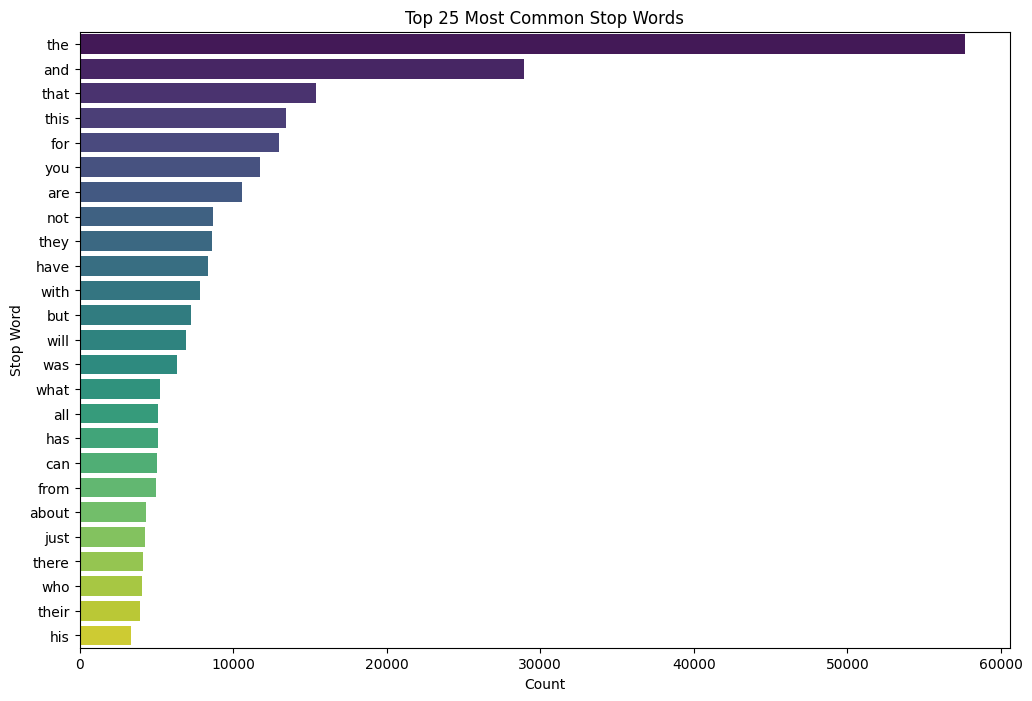

In [56]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_words', hue= 'stop_words', legend = False,  palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [57]:
df['num_chars'] = df['clean_comment'].apply(len)

In [58]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690


In [59]:
df['num_chars'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [60]:
all_text = ' '.join(df['clean_comment'])

char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(), columns = ['character', 'frequency']).sort_values(by = 'frequency', ascending = False)

In [61]:
char_frequency_df['character'].values

array([' ', 'e', 't', ..., '呗', 'ഥ', '杨'], dtype=object)

In [62]:
char_frequency_df.tail(50)

,character,frequency
1336,回,1
1337,毫,1
1322,足,1
1323,够,1
1324,假,1
1325,才,1
1326,叫,1
1327,醒,1
1328,妖,1
1329,婆,1


In [63]:
df['num_punctuations_chars'] = df['clean_comment'].apply(
    lambda x : sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuations_chars
21271,our honourable shri modi said would like reass...,-1,129,51,790,0
20075,maharashtra minister for labour and skill deve...,-1,59,19,356,0
8556,even dick dasterdly and the vulture squadron h...,0,11,4,71,0
16210,gaslighter chief,0,2,0,16,0
9473,has anyone cross checked the authenticity the ...,1,23,6,143,0


In [64]:
df['num_punctuations_chars'].describe()

count    36793.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: num_punctuations_chars, dtype: float64

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
def get_top_ngrams(corpus, n = None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]

In [69]:
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

In [70]:
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns = ['bigrams', 'count'])

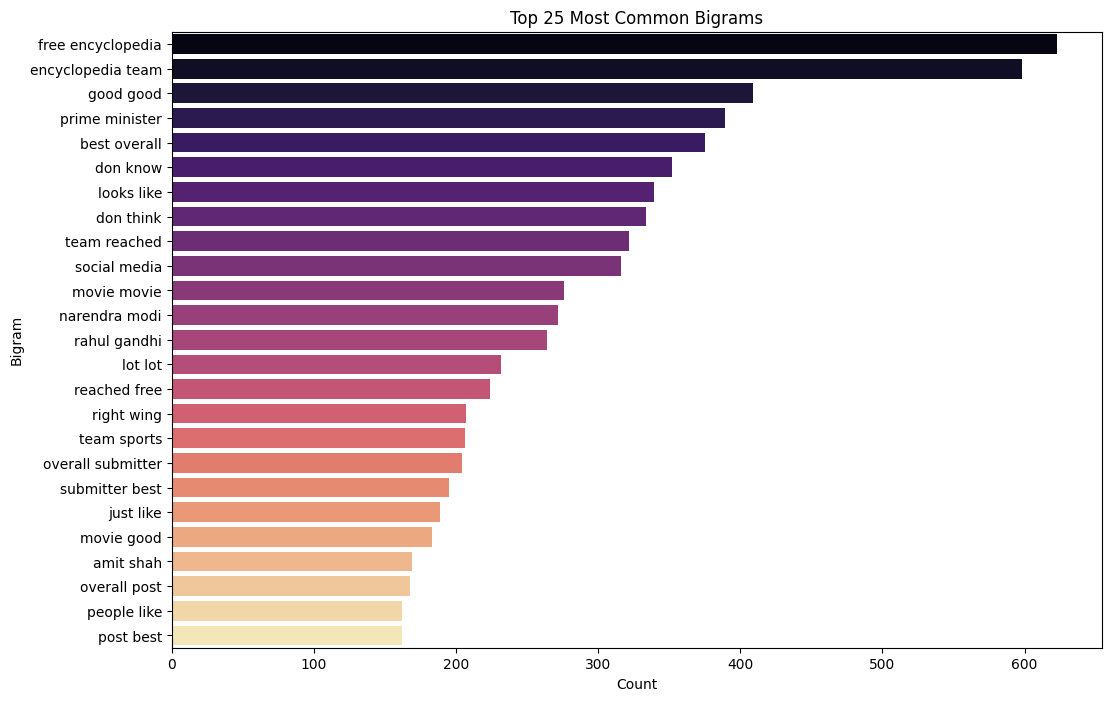

In [75]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigrams',hue = 'bigrams' ,legend= False ,palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

In [76]:
def get_top_trigrams(corpus, n = None):
    vec = CountVectorizer(ngram_range=(3,3), stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n] 

In [77]:
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

In [78]:
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns = ['trigram', 'count'])

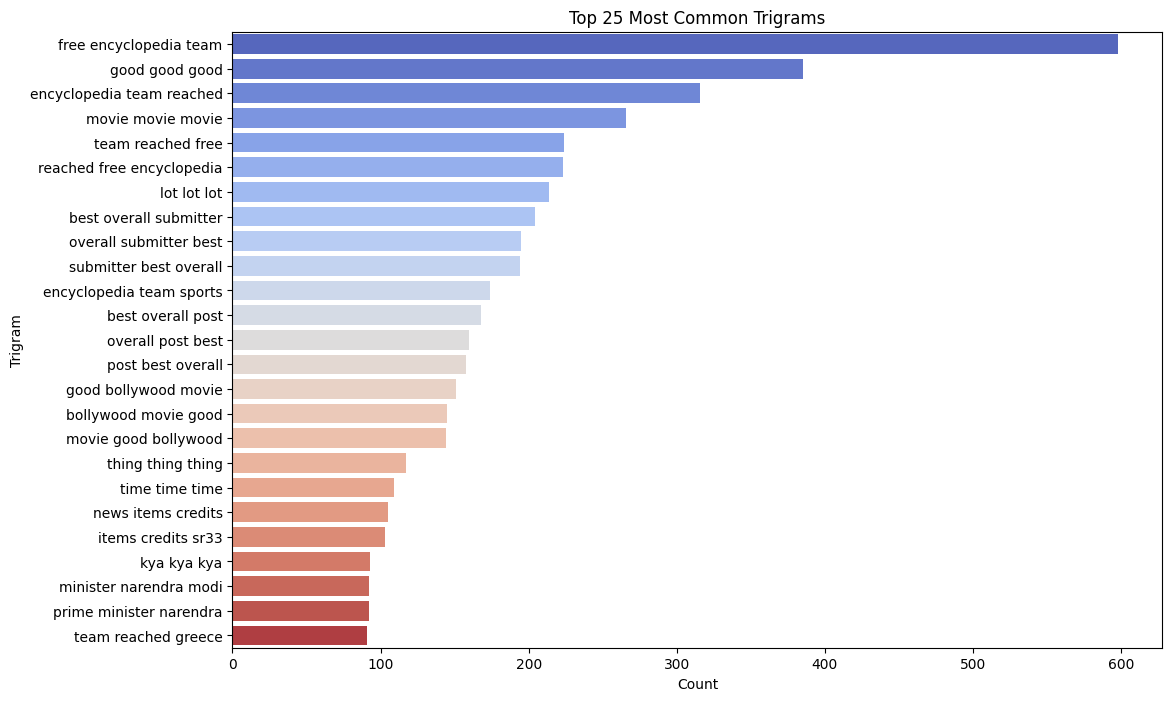

In [82]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram',hue = 'trigram', legend=False, palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [83]:
import re

In [84]:
df['clean_comment'] = df['clean_comment'].apply(lambda x : re.sub(r'[^A-Za-z0-9\s!?.,]', '',str(x)))

In [85]:
all_text = ' '.join(df['clean_comment'])

char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(), columns = ['character', 'frequency']).sort_values(by = 'frequency', ascending = False)

In [86]:
char_frequency_df

,character,frequency
6,,1091592
12,e,666610
13,t,491287
1,a,481134
3,i,401388
9,n,388465
7,o,379908
17,s,355279
8,r,331425
10,h,296748


In [87]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuations_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [88]:
from nltk.stem import WordNetLemmatizer

In [89]:
nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()

df['clean_comment'] = df['clean_comment'].apply(
    lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [90]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuations_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism ha very much lot compatible with chri...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [92]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

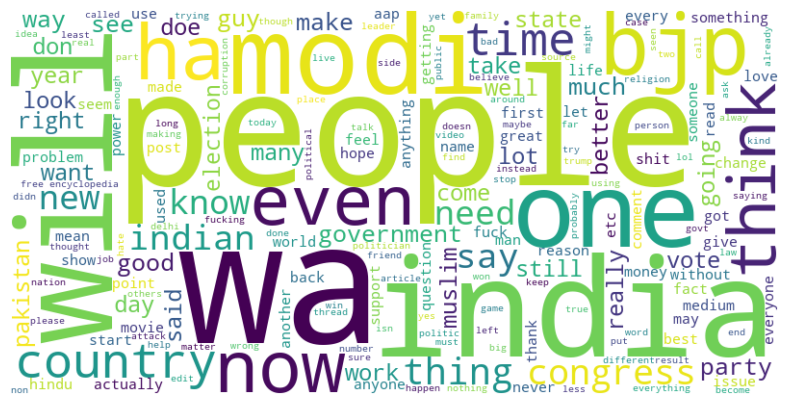

In [93]:
plot_word_cloud(df['clean_comment'])

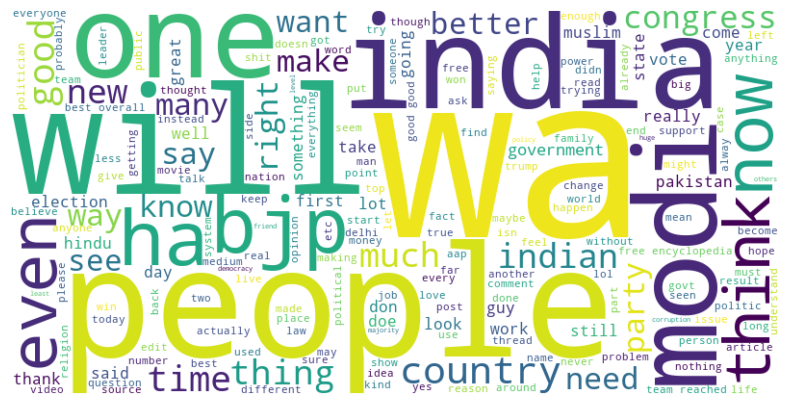

In [94]:
plot_word_cloud(df[df['category'] == 1]['clean_comment'])

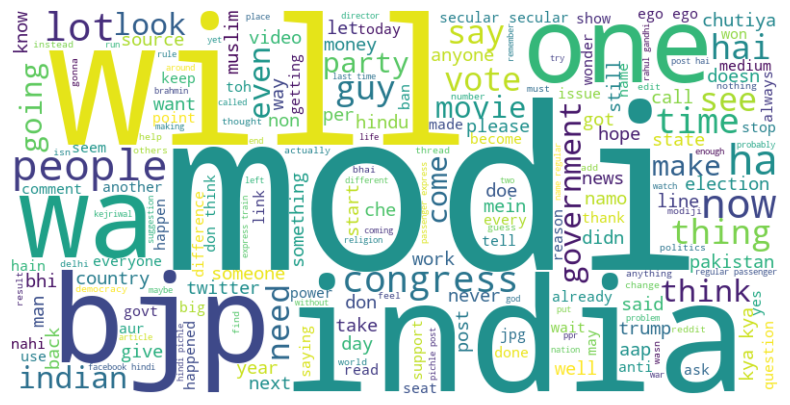

In [95]:
plot_word_cloud(df[df['category'] == 0]['clean_comment'])

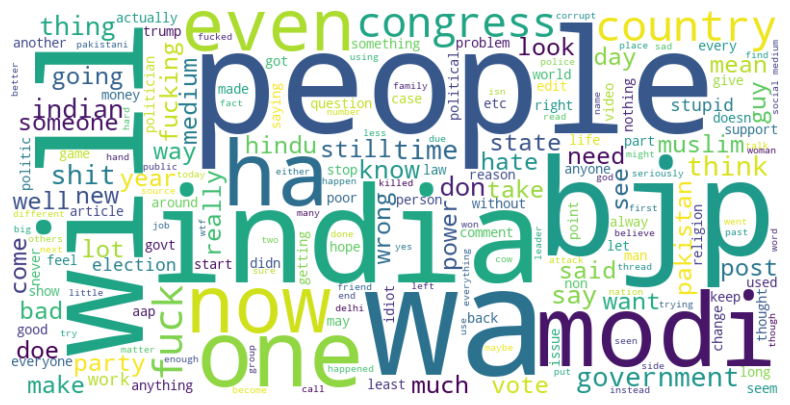

In [97]:
plot_word_cloud(df[df['category'] == -1]['clean_comment'])

In [ ]:
def plot_top_n_words(df, n = 20):

    words = ' '.join(df['clean_comment']).split()

    counter = Counter(words)
    most_common_words = counter.most_common(n)
    
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10,6))
    sns.barplot(x = list(counts), y = list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

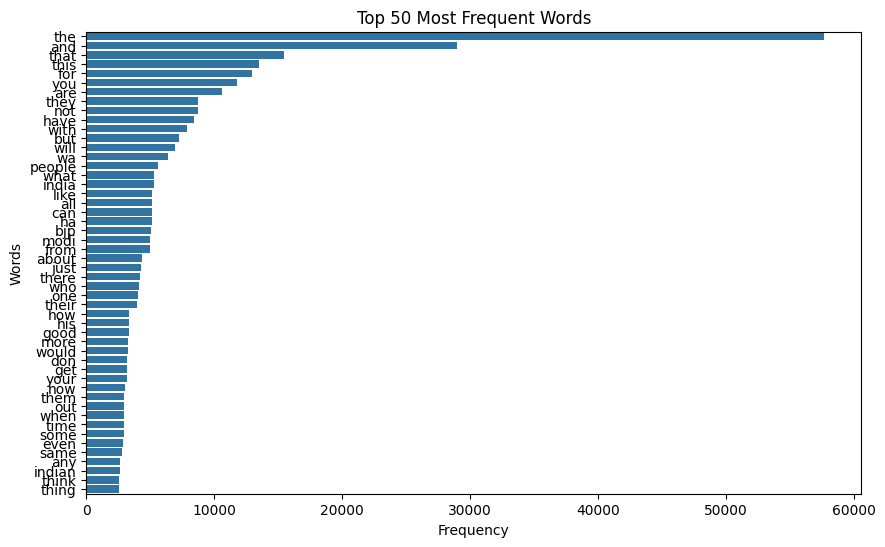

In [104]:
plot_top_n_words(df, n = 50)

In [ ]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  

            
            word_category_counts[word][category] += 1

    
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  
    plt.show()

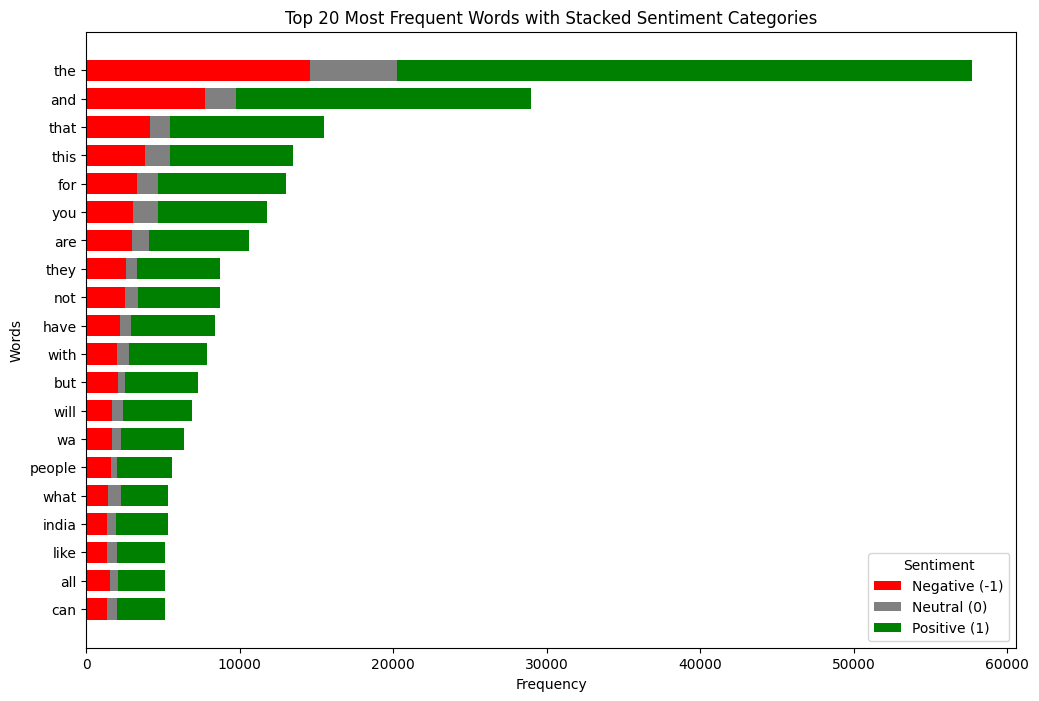

In [108]:
plot_top_n_words_by_category(df, n = 20)